In [37]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data_df, ride_data_df, on="city")
# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [38]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [39]:
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

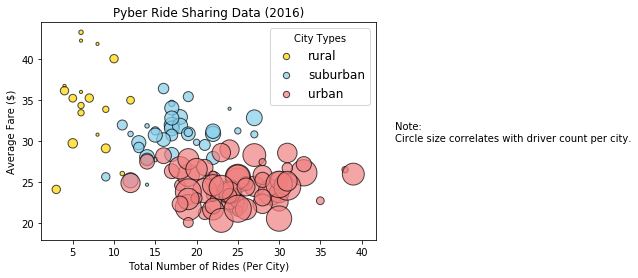

In [40]:
# Obtain the x and y coordinates for each of the three city types
# split data up in to 3 sections
rural_type = combined_data[combined_data["type"] == "Rural"]
suburban_type = combined_data[combined_data["type"] == "Suburban"]
urban_type = combined_data[combined_data["type"] == "Urban"]

rural_total_rides = rural_type.groupby(["city"]).count()["ride_id"]
rural_fare_avg = rural_type.groupby(["city"]).mean()["fare"]
rural_total_drivers = rural_type.groupby(["city"]).mean()["driver_count"]

suburban_total_rides = suburban_type.groupby(["city"]).count()["ride_id"]
suburban_fare_avg = suburban_type.groupby(["city"]).mean()["fare"]
surburban_total_drivers = suburban_type.groupby(["city"]).mean()["driver_count"]

urban_total_rides = urban_type.groupby(["city"]).count()["ride_id"]
urban_fare_avg = urban_type.groupby(["city"]).mean()["fare"]
urban_total_drivers = urban_type.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(rural_total_rides, rural_fare_avg, s=rural_total_drivers*10, c='gold', edgecolors='black', alpha=0.7, label="rural")

plt.scatter(suburban_total_rides, suburban_fare_avg, s=surburban_total_drivers*10, c='skyblue', edgecolors='black', alpha=0.7, label="suburban")

plt.scatter(urban_total_rides, urban_fare_avg, s=urban_total_drivers*10, c='lightcoral', edgecolors='black', alpha=0.7, label="urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(title="City Types", fontsize=12)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]


# Incorporate a text label regarding circle size
plt.text(44,30, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig('pyber_ride.png')

In [46]:
# Show plot
plt.show()

## Total Fares by City Type

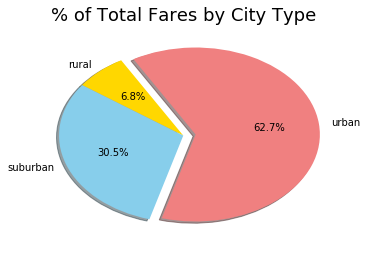

<Figure size 432x288 with 0 Axes>

In [54]:
# Calculate Type Percents
total_fares = combined_data.groupby(["type"]).sum()["fare"]/ combined_data["fare"].sum() * 100
city_type = ['rural', 'suburban', 'urban']
cols = ['gold','skyblue','lightcoral']



# Build Pie Chart
# plt.pie(total_fares, 
#         radius=1, 
#         explode=(0,0,0.1), 
#         startangle=120, 
#         shadow=True, 
#         colors=cols, 
#         frame=False,
#         labels=city_type, 
#         autopct='%1.1f%%')
# plt.title("% of Total Fares by City Type", fontsize=18)

fig, ax = plt.subplots()
ax.pie(total_fares, labels = city_type, explode=(0,0,0.1), colors=cols, autopct='%.1f%%', shadow=True, startangle=120)
ax.set_aspect(0.7)
plt.title("% of Total Fares by City Type", fontsize=18)
plt.show()

# Save Figure
plt.savefig("total_fare.png")

In [43]:
total_fares.head()

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [21]:
# Show Figure
plt.show()

## Total Rides by City Type

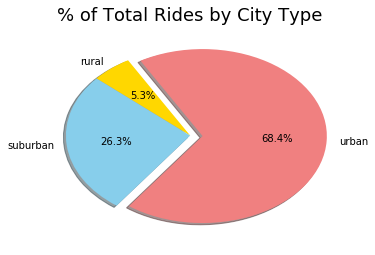

<Figure size 432x288 with 0 Axes>

In [55]:
# Calculate Ride Percents
total_rides = combined_data.groupby(["type"]).count()["ride_id"] / combined_data["ride_id"].count() * 100
# Build Pie Chart
city_type = ['rural', 'suburban', 'urban']
cols = ['gold','skyblue','lightcoral']

# plt.pie(total_rides, 
#         radius=1, 
#         explode=(0,0,0.1), 
#         startangle=120, 
#         shadow=True, 
#         colors=cols, 
#         labels=city_type, 
#         autopct='%1.1f%%')
# plt.title("% of Total Rides by City Type", fontsize=18)
# plt.axis('scaled')

fig, ax = plt.subplots()
ax.pie(total_rides, labels = city_type, explode=(0,0,0.1), colors=cols, autopct='%.1f%%', shadow=True, startangle=120)
ax.set_aspect(0.7)
plt.title("% of Total Rides by City Type", fontsize=18)
plt.show()

# Save Figure
plt.savefig('total_rides.png')

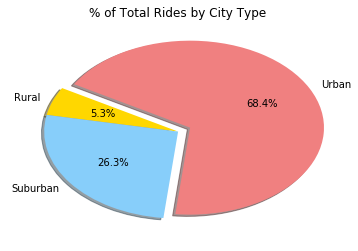

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

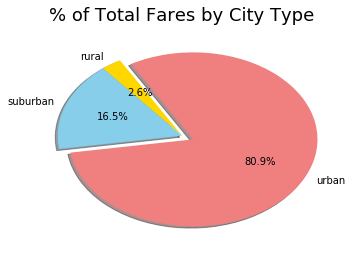

<Figure size 432x288 with 0 Axes>

In [56]:
# Calculate Driver Percents
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"] * 100
#total_drivers

# Build Pie Charts
city_type = ['rural', 'suburban', 'urban']
cols = ['gold','skyblue','lightcoral']

# plt.pie(total_drivers, radius=1, 
#         explode=(0,0,0.1), 
#         startangle=120, 
#         shadow=True, 
#         colors=cols, 
#         labels=city_type, 
#         autopct='%1.1f%%')
# plt.title("% of Total Drivers by City Type", fontsize=18)
# plt.axis('scaled')

fig, ax = plt.subplots()
ax.pie(total_drivers, labels = city_type, explode=(0,0,0.1), colors=cols, autopct='%.1f%%', shadow=True, startangle=120)
ax.set_aspect(0.7)
plt.title("% of Total Fares by City Type", fontsize=18)
plt.show()

# Save Figure
plt.savefig('total_drivers.png')

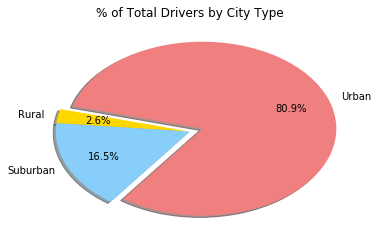

In [6]:
# Show Figure
plt.show()